In [8]:
import pandas as pd
data = pd.read_csv("/content/customer_churn_prediction_dataset.csv")

In [9]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0001-XXXX,Male,0,Yes,Yes,5,No,Yes,No,No,...,No,No,No,No internet service,Month-to-month,Yes,Credit card,27.43,137.15,Yes
1,0002-XXXX,Female,0,No,No,42,Yes,No phone service,DSL,Yes,...,No,No,No internet service,No internet service,Two year,No,Electronic check,38.28,1607.76,Yes
2,0003-XXXX,Male,0,No,No,61,Yes,No phone service,No,No,...,No,Yes,Yes,No,One year,No,Bank transfer,106.44,6492.84,Yes
3,0004-XXXX,Male,1,No,Yes,22,Yes,No,No,No internet service,...,Yes,No,No internet service,Yes,Month-to-month,No,Electronic check,92.49,2034.78,No
4,0005-XXXX,Male,1,Yes,Yes,21,No,No,DSL,No,...,No internet service,No,No,No internet service,One year,No,Bank transfer,19.63,412.23,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0296-XXXX,Female,1,No,Yes,61,No,Yes,DSL,No,...,Yes,No internet service,No,No,One year,Yes,Electronic check,42.52,2593.72,No
296,0297-XXXX,Female,0,No,No,49,Yes,No phone service,DSL,No internet service,...,Yes,No internet service,Yes,Yes,Month-to-month,Yes,Mailed check,22.31,1093.19,Yes
297,0298-XXXX,Male,0,No,Yes,71,Yes,Yes,DSL,No internet service,...,Yes,Yes,No,Yes,Two year,No,Mailed check,59.57,4229.47,Yes
298,0299-XXXX,Male,1,Yes,Yes,1,Yes,Yes,No,Yes,...,No internet service,No internet service,Yes,Yes,Two year,No,Credit card,31.32,31.32,No


Linear Regression

Mean Squared Error: 0.26431361352465393
R-squared:-0.07639028132212022


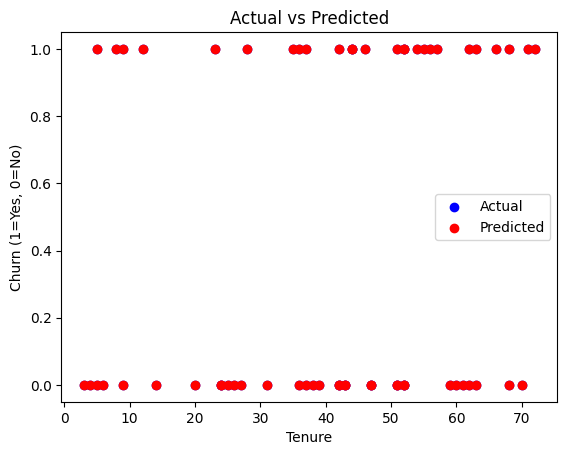

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen']]
y = data['Churn'].map({'Yes':1,'No' :0})
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R-squared:{r2}')
plt.scatter(x_test['tenure'],y_test, color='blue', label='Actual')
plt.scatter(x_test['tenure'],y_test, color='red', label='Predicted')
plt.title("Actual vs Predicted")
plt.xlabel("Tenure")
plt.ylabel("Churn (1=Yes, 0=No)")
plt.legend()
plt.show()
